In [1]:

from datetime import datetime
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
#this is a recursive function as it will call the function until u write a a valid date
#use of this file to write fuctions to get all information from users
from datetime import datetime
# function to get date allow default is used to enter the defualt date as they press enter prompt to ask date for different reasons
date_format= "%d-%m-%Y"
#category  variable to ensure they type within it
categories={"I":"INCOME","E":"EXPENSE"}
def get_date(prompt,allow_default=False):
    date_str=input(prompt)
    #if they did not give any input
    if allow_default and not date_str:
        return datetime.today().strftime(date_format)
    try:
        #so that the user time in valid date and the valid date formats to a string
        valid_date=datetime.strptime(date_str,date_format)
        return valid_date.strftime(date_format)
    except ValueError:
        print("invalid date please enter the correct date in dd-mm-yyy")
        return get_date(prompt,allow_default)

def get_amount():
    try:
        amount=float(input("enter the amount:"))
        if amount <=0:
            raise ValueError("amount must be a non negative and non zero value")
        return amount
    except ValueError as e:
        print(e)
        return get_amount()

def get_categories():
    category=input("enter the category ('I'for income or'E' for expense):").upper()
    if category in categories:
        return categories[category] #CALLING A DICTIONARY CATEGORY
    
    print("invalid category,please enter 'I' OR 'E'")
    return get_categories
def get_description():
    return input("enter a description (optional): ")


1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
Invalid choice. Enter 1, 2 or 3.

1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
Invalid choice. Enter 1, 2 or 3.

1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
Invalid choice. Enter 1, 2 or 3.

1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
new entry added sucessfully

1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
No transactions found in the given date range.

Summary:
Total Income: $0.00
Total Expense: $0.00
Net Savings: $0.00


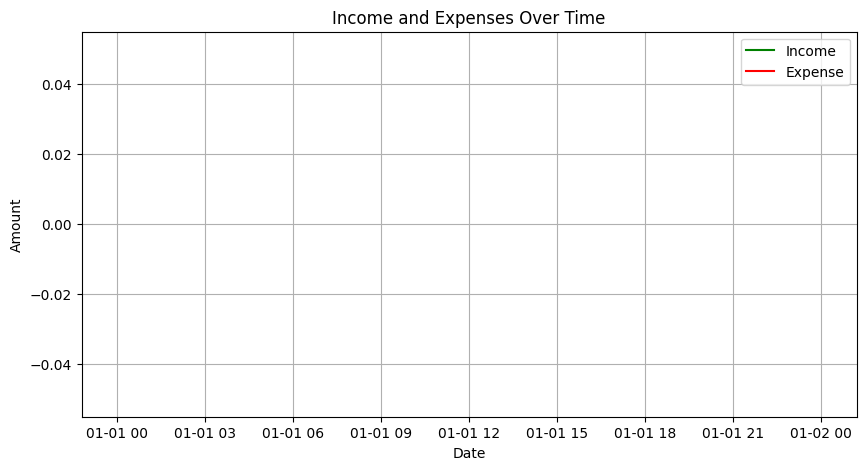


1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
could not convert string to float: '1-10-2024'
could not convert string to float: '1-12-2024'
new entry added sucessfully

1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
No transactions found in the given date range.

Summary:
Total Income: $0.00
Total Expense: $0.00
Net Savings: $0.00


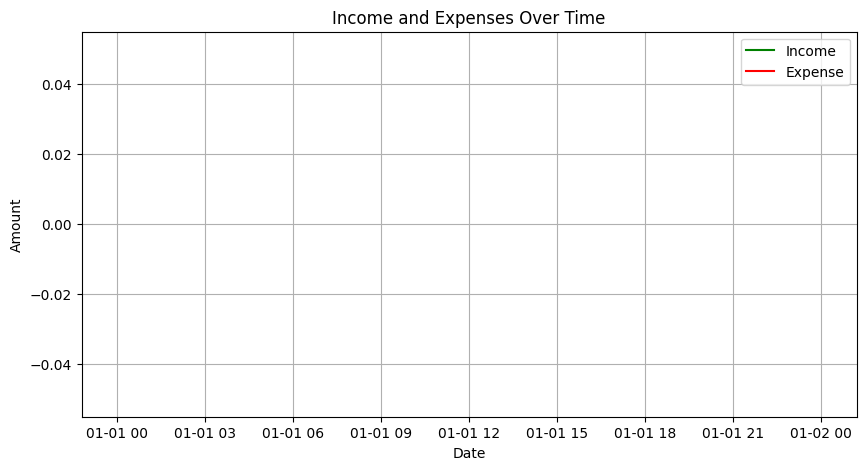


1. Add a new transaction
2. View transactions and summary within a date range
3. Exit
Exiting...


In [5]:
# creating a class method to create csv file uusing pandas
import pandas as pd
import csv
from datetime import datetime


class CSV:
    CSV_FILE="finance_data.csv"
    columns=["date","amount","category","description"]
    FORMAT="%d-%m-%Y"
    #initalized the csv file using class method and made coloumns in it
    @classmethod
    def initialize_csv(cls):
        try:
            pd.read_csv(cls.CSV_FILE)
            #create new csv file and making columns in it
        except FileNotFoundError:
            df=pd.DataFrame(cls.columns)
            df.to_csv(cls.CSV_FILE ,index=False)
       #using class method to add the entry to the csv file 
    @classmethod
    # created a method to add  a new entry and made a new dictionary that we want to add into the csv file
    def add_entry(cls,date,amount,category,description):
         new_entry={
             "date":date,
             "amount":amount,
             "category":category,
             "description":description
             
             
         } 
         #then we opend the csv file into append mode and used writer to write into the dictionary
         with open(cls.CSV_FILE,"a",newline="") as csvfile:   #newline used so it dosent add a new line
             writer=csv.DictWriter(csvfile, fieldnames=cls.columns)        #csv write take a dict and write it into csv file
             writer.writerow(new_entry)
         print("new entry added sucessfully")
         
    @classmethod
    #to get transactions in a date range and summarize the data
    def get_transactions(cls, start_date, end_date):
        #reading csv
        df = pd.read_csv(cls.CSV_FILE)
        #acess all values of date colums
        df['date']=pd.to_datetime (df['date'],format=CSV.FORMAT)
        start_date=datetime.strptime(start_date,CSV.FORMAT)
        end_date=datetime.strptime(end_date,CSV.FORMAT)
        #mask we can apply to different rows inside a data frame to see if we should select that row or not
        mask= (df["date"] >= start_date) & (df["date"] <= end_date)
        filtered_df=df.loc[mask]
        
        if filtered_df.empty:
            print("No transactions found in the given date range.")
        else:
            print(
                f"Transactions from {start_date.strftime(CSV.FORMAT)} to {end_date.strftime(CSV.FORMAT)}"
            )
            print(
                filtered_df.to_string(
                    index=False, formatters={"date": lambda x: x.strftime(CSV.FORMAT)}
                )
            )
        total_income = filtered_df[filtered_df["category"] == "Income"][
                "amount"
            ].sum()
        total_expense = filtered_df[filtered_df["category"] == "Expense"][
                "amount"
            ].sum()
        #for 2 decimal places rounding off we use 2f
        print("\nSummary:")
        print(f"Total Income: ${total_income:.2f}")
        print(f"Total Expense: ${total_expense:.2f}")
        print(f"Net Savings: ${(total_income - total_expense):.2f}")

        return filtered_df

#write a function that will call the function from the finance notebook
def add():
    CSV.initialize_csv()
    date= get_date("enter the date of the transaction",allow_default=True)
    amount=get_amount()  
    category=get_categories() 
    description  = get_description()
    CSV.add_entry(date,amount,category,description) 
    
def plot_transaction(df):
    df.set_index("date", inplace=True)

    income_df = (
        df[df["category"] == "Income"]
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )
    expense_df = (
        df[df["category"] == "Expense"]
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )

    plt.figure(figsize=(10, 5))
    plt.plot(income_df.index, income_df["amount"], label="Income", color="g")
    plt.plot(expense_df.index, expense_df["amount"], label="Expense", color="r")
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.title("Income and Expenses Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_transactions(df):
    df.set_index("date",inplace=True)
    income_df = (
        df[df["category"] == "Income"]
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )
    expense_df = (
        df[df["category"] == "Expense"]
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )

    plt.figure(figsize=(10, 5))
    plt.plot(income_df.index, income_df["amount"], label="Income", color="g")
    plt.plot(expense_df.index, expense_df["amount"], label="Expense", color="r")
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.title("Income and Expenses Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()


def main():
      while True:
        print("\n1. Add a new transaction")
        print("2. View transactions and summary within a date range")
        print("3. Exit")
        choice = input("Enter your choice (1-3): ")

        if choice == "1":
            add()
        elif choice == "2":
            start_date = get_date("Enter the start date (dd-mm-yyyy): ")
            end_date = get_date("Enter the end date (dd-mm-yyyy): ")
            df = CSV.get_transactions(start_date, end_date)
            if input("Do you want to see a plot? (y/n) ").lower() == "y":
                plot_transactions(df)
        elif choice == "3":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Enter 1, 2 or 3.")  
    
# This block will only execute if the script is run directly.
if __name__ == "__main__":
    main()  # Calls the main function if the script is executed directly

In [ ]:
# HERE IS THE EXPLANATIO
@classmethod
# This function retrieves transactions from a CSV file based on a specified date range.
# It also summarizes the total income, total expenses, and net savings within that range.
def get_transactions(cls, start_date, end_date):
    # Step 1: Reading the CSV file
    # The function starts by reading a CSV file that contains transaction data. This file is specified by
    # the class variable CSV_FILE. The data is loaded into a pandas DataFrame called 'df'.
    df = pd.read_csv(cls.CSV_FILE)

    # Step 2: Converting the 'date' column to datetime format
    # The 'date' column in the DataFrame contains dates stored as strings. To perform date comparisons,
    # we need to convert these strings into a datetime format. The `pd.to_datetime()` function is used for this conversion.
    # The 'format' argument specifies the format in which the dates are stored.
    df['date'] = pd.to_datetime(df['date'], format=CSV.FORMAT)

    # Step 3: Converting input dates to datetime
    # The start_date and end_date parameters are received as strings. They are also converted to datetime format
    # using the `datetime.strptime()` method, which allows us to specify the expected format for the input dates.
    start_date = datetime.strptime(start_date, CSV.FORMAT)
    end_date = datetime.strptime(end_date, CSV.FORMAT)

    # Step 4: Creating a mask for filtering
    # A mask is created to filter the DataFrame. The mask checks which rows in the 'date' column fall within the
    # specified range (from start_date to end_date). This is done using a boolean condition that combines two comparisons:
    # one for checking if the date is greater than or equal to start_date and the other for checking if it is less than or equal to end_date.
    mask = (df["date"] >= start_date) & (df["date"] <= end_date)

    # Step 5: Filtering the DataFrame
    # The filtered DataFrame 'filtered_df' is created by applying the mask to 'df' using the .loc method.
    # This selects only the rows that match the condition defined by the mask.
    filtered_df = df.loc[mask]
    
    # Step 6: Checking if any transactions were found
    # An if statement checks if 'filtered_df' is empty (i.e., no transactions were found in the specified date range).
    # If it is empty, a message is printed indicating that no transactions were found.
    if filtered_df.empty:
        print("No transactions found in the given date range.")
    else:
        # If transactions are found, a message is printed displaying the date range for which transactions are being shown.
        print(f"Transactions from {start_date.strftime(CSV.FORMAT)} to {end_date.strftime(CSV.FORMAT)}")
        
        # The filtered DataFrame is printed to the console, formatted to show the 'date' column in the specified format.
        print(filtered_df.to_string(index=False, formatters={"date": lambda x: x.strftime(CSV.FORMAT)}))

    # Step 7: Calculating total income and expenses
    # Total income is calculated by filtering 'filtered_df' for rows where the category is "Income"
    # and summing the 'amount' column.
    total_income = filtered_df[filtered_df["category"] == "Income"]["amount"].sum()
    
    # Total expenses are calculated similarly, but filtering for rows where the category is "Expense".
    total_expense = filtered_df[filtered_df["category"] == "Expense"]["amount"].sum()
    
    # Step 8: Printing the summary
    # A summary is printed that includes the total income, total expenses, and net savings.
    # Net savings are calculated as total income minus total expenses.
    print("\nSummary:")
    print(f"Total Income: ${total_income:.2f}")  # The amount is formatted to two decimal places
    print(f"Total Expense: ${total_expense:.2f}")
    print(f"Net Savings: ${(total_income - total_expense):.2f}")

    # Step 9: Returning the filtered DataFrame
    # Finally, the filtered DataFrame 'filtered_df' is returned so it can be used for further processing if needed.
    return filtered_df


In [ ]:
 """plotting function explanation'''''
    This function plots the income and expenses over time using a line graph.

    Parameters:
    df (DataFrame): A pandas DataFrame containing financial transaction data with at least
                    'date', 'category', and 'amount' columns.

    Detailed Explanation:
    1. Set the Date as Index:
        - The function uses the 'date' column as the index of the DataFrame. This makes it easier
          to work with the data based on dates.

    2. Filter Income Transactions:
        - The function creates a new DataFrame called 'income_df' that contains only the transactions
          where the category is 'Income'.
        - It groups the income transactions by day using the resample method and sums the amounts
          for each day. This means that if you have multiple income entries for the same day, they
          will be combined into one total for that day.
        - If any days have no income transactions, those days are included with an amount of $0.

    3. Filter Expense Transactions:
        - Similarly, the function creates another DataFrame called 'expense_df' that contains only
          the transactions where the category is 'Expense'.
        - It follows the same steps as the income DataFrame: it groups by day, sums the amounts,
          and fills in $0 for days with no expenses.

    4. Create the Plot:
        - The function creates a new figure for the plot with a specified size (10 inches wide
          and 5 inches tall).
        - It plots the income data on the graph with the x-axis representing dates and the y-axis
          representing income amounts. The line for income is green and labeled as 'Income'.
        - It then plots the expense data similarly, with the line for expenses being red and labeled
          as 'Expense'.

    5. Label the Axes and Add Title:
        - The x-axis is labeled as 'Date', and the y-axis is labeled as 'Amount'.
        - The title of the plot is set to 'Income and Expenses Over Time', giving viewers a clear
          understanding of what the graph represents.

    6. Show the Legend:
        - A legend is added to the plot to help distinguish between the income and expense lines.

    7. Enable the Grid:
        - A grid is enabled on the plot, making it easier to read and interpret the values.

    8. Display the Plot:
        - Finally, the plot is displayed on the screen for the user to see.

    This function is helpful for visualizing financial data and understanding trends in income and expenses
    over time.
    """"""""""""""""""